# Building a Neuron: The Role of the Sigmoid Function, An Activation Function

Creating a neuron involves several steps and relies heavily on mathematics. Among these, the sigmoid function plays a crucial role.

The sigmoid function, also known as the logistic function, introduces non-linearity into the neuron. This means it helps the model learn complex relationships between variables, unlike linear models where changes in one variable directly affect another (e.g., doubling the length of a rectangle doubles its width).

## Understanding Non-Linearity

In real-world scenarios, relationships between variables are often non-linear. For example, consider a car's speed (variable A) and its fuel consumption (variable B). Doubling the speed (A) wouldn't simply double the fuel consumption (B). This is because air resistance increases exponentially as speed increases (another variable C affecting B). This creates a roughly cubic relationship between speed and fuel consumption.

Here's an illustration:

- **Linear Assumption (incorrect):** One might assume that doubling a car's speed would simply double its fuel consumption.
- **Reality (non-linear):** Doubling speed increases air resistance significantly, leading to a much higher (cubic) increase in fuel consumption.

Data points:

- At 30 mph, a car might use 24 mpg.
- At 60 mph, instead of 12 mpg (linear assumption), it might use 30 mpg (non-linear effect).
- At 90 mph, consumption might drop to 18 mpg (air resistance becomes more dominant).

The sigmoid function allows neurons to capture these non-linear relationships, making them powerful tools for tackling complex problems.

## Sigmoid Function Formula

$$
\frac{1}{1+e^{-x}}
$$

## Weights and Biases

Often times we initialize the weights and biases as random. This is because we want to avoid having all neurons in a neural network be the same weight, as then it is likely that all neurons will behave the exact same and that is not helpful for learning different aspects of the data.

### What is a weight and a bias?

**Weight:** A weight is a variable within a neuron that serves to scale or de-scale a data point's importance.

**Bias:** A bias is a constant variable added to data points whose whole purpose is to "shift the activation function in a sense." This helps in handling inputs that are not centered around zero.

## Evaluating a Predicted Data Point

The evaluation of a data point is quite crucial, as it tells you how far you are from the prediction. There are two specific ways that we are going to cover in which you can evaluate a predicted data point.

### Binary Cross Entropy Loss

This is commonly used for binary classification tasks. It measures the performance of a classification model whose output is a probability value between 0 and 1.

$$
-\frac{1}{n}\sum_{i=1}^{n}\left[y_i \log(y_i^{\hat}) + (1-y_i) \log(1-y_i^{\hat})\right]
$$

where \( y_i^{\hat} \) is the predicted output and \( y_i \) is the actual output.

### Mean Squared Error

This one is used in regression tasks to measure the Euclidean distances (squared) between the predicted output and the actual output.

$$
\frac{1}{n}\sum_{i=1}^{n}(y_i^{\hat} - y_i)^2
$$

## Calculating Gradient

The gradient is a vector of partial derivatives of the loss function with respect to each parameter (weight and bias) in the network. It indicates the direction and magnitude of the steepest increase in the loss function. We use its negative to update parameters, moving towards minimizing the loss.

## Steps

1. **Calculate the Error** using either the loss function formula for binary cross-entropy loss or simply by calculating the difference between the predicted point and the actual point. To compute the derivative of the loss with respect to the predicted output:
   $$y^{\hat} - y$$

2. **Calculate the Partial Derivatives:**
   1. Partial derivatives are kinda simple since you are calculating the derivative of a variable with respect to another variable, but you often treat variable b as a constant. To compute the derivative of the predicted output with respect to the weighted sum:
      $$
      y^{\hat}(1 - y^{\hat})
      $$

      To compute the derivative of the weighted sum with respect to each weight:
      $$
      x_i
      $$

3. **Use the Chain Rule:**
   $$
   x_i \cdot y^{\hat}(1 - y^{\hat}) \cdot (y^{\hat} - y)
   $$


In [17]:
'''PseudoCode

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

def initialize_parameters(input_size):
    weights = np.random.rand(input_size)
    bias = np.random.rand(1)
    return weights, bias

def forward_propagation(inputs, weights, bias):
    weighted_sum = np.dot(inputs, weights) + bias
    output = sigmoid(weighted_sum)
    return output, weighted_sum

def binary_cross_entropy_loss(predicted_output, actual_output):
    epsilon = 1e-15
    predicted_output = np.clip(predicted_output, epsilon, 1 - epsilon)
    loss = - (actual_output * np.log(predicted_output) + (1 - actual_output) * np.log(1 - predicted_output))
    return np.mean(loss)

def calculate_gradients(inputs, predicted_output, actual_output, weighted_sum):
    error = predicted_output - actual_output  # dL/dy
    d_loss_d_predicted = error
    d_predicted_d_weighted_sum = sigmoid_derivative(weighted_sum)  # dy/dz
    d_weighted_sum_d_weights = inputs  # dz/dw
    d_weighted_sum_d_bias = 1  # dz/db

    gradients = d_loss_d_predicted * d_predicted_d_weighted_sum * d_weighted_sum_d_weights
    bias_gradient = d_loss_d_predicted * d_predicted_d_weighted_sum * d_weighted_sum_d_bias

    return gradients, bias_gradient
'''



'PseudoCode\n\ndef sigmoid(x):\n    return 1 / (1 + np.exp(-x))\n\ndef sigmoid_derivative(x):\n    sig = sigmoid(x)\n    return sig * (1 - sig)\n\ndef initialize_parameters(input_size):\n    weights = np.random.rand(input_size)\n    bias = np.random.rand(1)\n    return weights, bias\n\ndef forward_propagation(inputs, weights, bias):\n    weighted_sum = np.dot(inputs, weights) + bias\n    output = sigmoid(weighted_sum)\n    return output, weighted_sum\n\ndef binary_cross_entropy_loss(predicted_output, actual_output):\n    epsilon = 1e-15\n    predicted_output = np.clip(predicted_output, epsilon, 1 - epsilon)\n    loss = - (actual_output * np.log(predicted_output) + (1 - actual_output) * np.log(1 - predicted_output))\n    return np.mean(loss)\n\ndef calculate_gradients(inputs, predicted_output, actual_output, weighted_sum):\n    error = predicted_output - actual_output  # dL/dy\n    d_loss_d_predicted = error\n    d_predicted_d_weighted_sum = sigmoid_derivative(weighted_sum)  # dy/dz\n  

In [18]:
import numpy as np
class Neuron:


    def __init__(self, x, y, learning_rate=0.1, epochs=1000, type= 'Regression'):
        '''Class Constructor'''

        self.x = x
        self.y = y
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.type = type
        self.weights = np.random.rand(x.shape[1])
        self.bias = np.random.rand(1)
        self.loss = []
        self.predictions = []

    def compute_sigmoid(self, x):
        '''Compute Sigmoid function'''
        return 1 / (1 + np.exp(-x))
    
    def compute_wieghted_sum(self, inputs):
        '''Compute Weighted Sum'''
        return np.dot(inputs, self.weights) + self.bias
    def sigmoid_derivative(self,x):
        sig = self.compute_sigmoid(x)
        return sig * (1 - sig)
        
    def compute_loss(self, predicted_output, actual_output):
        '''Compute Loss'''
        if(self.type == 'Regression'):
            return np.mean((predicted_output - actual_output) ** 2)
        
        elif(self.type == 'Classification'):
            epsilon = 1e-15
            predicted_output = np.clip(predicted_output, epsilon, 1 - epsilon)
            return - (actual_output * np.log(predicted_output) + (1 - actual_output) * np.log(1 - predicted_output))
        
    def forward_propagation(self, input ):
        weighted_sum = self.compute_wieghted_sum(input)
        output = self.compute_sigmoid(weighted_sum)
        return output, weighted_sum

    def backward_propagation(self, grandients, bais_gradients):
        self.weights -= self.learning_rate * grandients
        self.bias -= self.learning_rate * bais_gradients      


    def calculate_gradients(self,inputs, predicted_output, actual_output, weighted_sum):
        error = predicted_output - actual_output  # dL/dy
        d_loss_d_predicted = error
        d_predicted_d_weighted_sum = self.sigmoid_derivative(weighted_sum)  # dy/dz
        d_weighted_sum_d_weights = inputs  # dz/dw
        d_weighted_sum_d_bias = 1  # dz/db

        gradients = d_loss_d_predicted * d_predicted_d_weighted_sum * d_weighted_sum_d_weights
        bias_gradient = d_loss_d_predicted * d_predicted_d_weighted_sum * d_weighted_sum_d_bias

        return gradients, bias_gradient
    
    
    def train(self):
        for epoch in range(self.epochs):
            total_loss = 0
            for i in range(len(self.x)):
                y_pred, wieghted_sum = self.forward_propagation(self.x[i])
                loss = self.compute_loss(y_pred, self.y[i])
                total_loss += loss
                gradients, bias_gradient = self.calculate_gradients(self.x[i], y_pred, self.y[i], self.compute_wieghted_sum(self.x[i]))
                self.backward_propagation(gradients, bias_gradient)
            
            average_loss = total_loss / len(self.x)
            self.loss.append(average_loss)
            print(f'Epoch: {epoch}, Loss: {average_loss}')


    def predict(self, x):
        return self.compute_sigmoid(self.compute_wieghted_sum(x))

    

## Using Sklearn to Build some random Data to Test Our Neuron

In [19]:
import numpy as np
from sklearn.datasets import make_classification, make_regression

# Generate synthetic data for classification
def generate_classification_data(samples=100, features=2):
    x, y = make_classification(n_samples=samples, n_features=features, n_informative=2, n_redundant=0, n_classes=2, random_state=1)
    return x, y

# Generate synthetic data for regression
def generate_regression_data(samples=100, features=2):
    x, y = make_regression(n_samples=samples, n_features=features, noise=0.1, random_state=1)
    return x, y

# Example usage
# Classification data
x_class, y_class = generate_classification_data(samples=100, features=2)

# Regression data
x_reg, y_reg = generate_regression_data(samples=100, features=2)

# Display some examples
print("Classification Data (first 5 samples):")
print("X:\n", x_class[:5])
print("Y:\n", y_class[:5])

print("\nRegression Data (first 5 samples):")
print("X:\n", x_reg[:5])
print("Y:\n", y_reg[:5])


Classification Data (first 5 samples):
X:
 [[ 1.30022717 -0.7856539 ]
 [ 1.44184425 -0.56008554]
 [-0.84792445 -1.36621324]
 [-0.72215015 -1.41129414]
 [-1.27221465  0.25945106]]
Y:
 [1 1 0 0 0]

Regression Data (first 5 samples):
X:
 [[ 0.0465673   0.80186103]
 [-2.02220122  0.31563495]
 [-0.38405435 -0.3224172 ]
 [-1.31228341  0.35054598]
 [-0.88762896 -0.19183555]]
Y:
 [ 70.97621092 -37.8840955  -40.37691982 -12.10161298 -45.07000824]


In [20]:
# Create and train the neuron for classification
neuron_class = Neuron(x_class, y_class, learning_rate=0.3, epochs=1, type='Classification')
neuron_class.train()

# Predict with new inputs for classification
new_inputs_class = np.array([0.5, 1.5])
predicted_output_class = neuron_class.predict(new_inputs_class)
print(f'Predicted Output for New Classification Inputs: {predicted_output_class}')


Epoch: 0, Loss: [0.34184984]
Predicted Output for New Classification Inputs: [0.72165364]


In [21]:

# Create and train the neuron for regression
neuron_reg = Neuron(x_reg, y_reg, learning_rate=.001, epochs=1, type='Regression')
neuron_reg.train()

# Predict with new inputs for regression
new_inputs_reg = np.array([0.5, 1.5])
predicted_output_reg = neuron_reg.predict(new_inputs_reg)
print(f'Predicted Output for New Regression Inputs: {predicted_output_reg}')


Epoch: 0, Loss: 6112.249839118399
Predicted Output for New Regression Inputs: [0.95360536]


# Building a Simple Neural Network

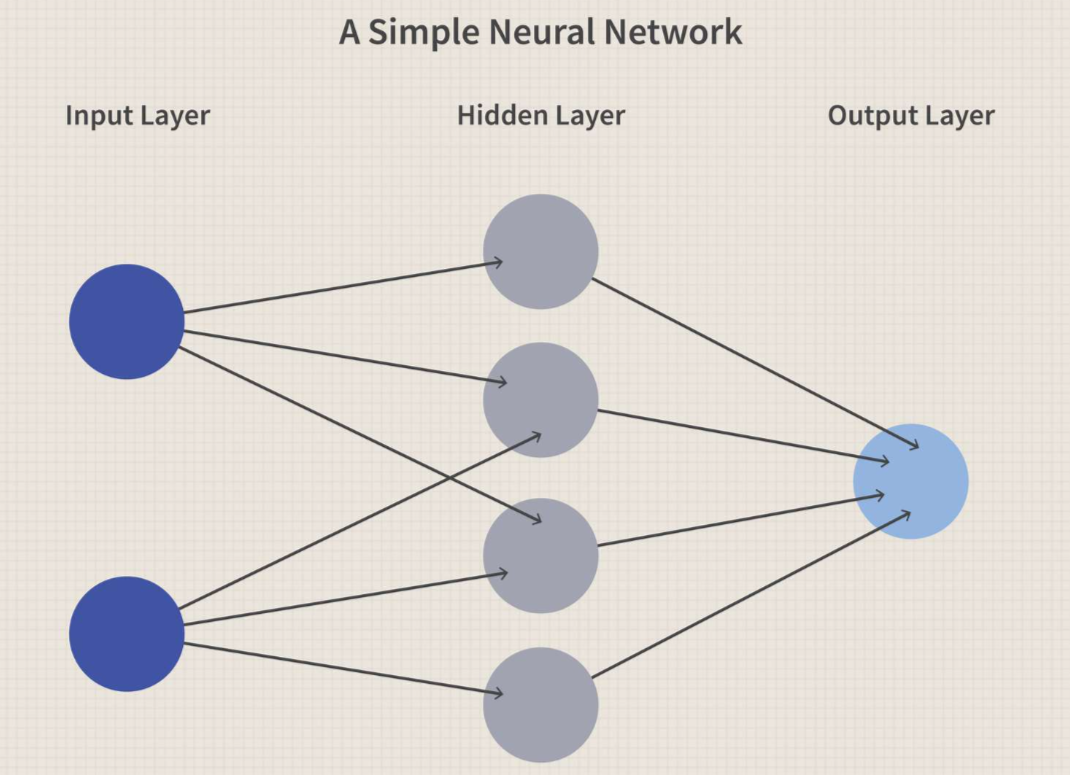


### What is a Input Layer
- The input layer is the first layer of the neural network, where the network receives the input data. Each neuron in the input layer represents one feature of the input data. The input layer doesn't perform any computations; it simply passes the input data to the next layer.


### What is a Hidden Layer
- The intermediation layers composed of neurons that perform the computations and transformations needed to predict the correct output

### What is the Output Layer
- A one nueron layer that produced the output based on the calculations performed by the hidden layer



In [22]:
'''
Psuedo Code

class Simple_Nueral_Network:

    def __init__(self, x, y, learning_rate=0.1, epochs=1000, type='Regression', layers, layer_neurons):
        self.x = x
        self.y = y
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.type = type
        self.loss = []
        self.predictions = []
        #? For the sake of Simplicity we will assume all hidden layers have the same number of neurons
        self.layers = layers
        self.layer_neurons = layer_neurons

    def build_layers(self):
        self.neurons = {}
        for i in range(self.layers):
            self.neurons[i] = []
            for j in range(self.layer_neurons):
                self.neurons[i].append(Neuron(x, y, learning_rate, epochs, type))


    def forward_propagation(self, i):
            for j in range(self.layer_neurons):
                if i == 0: #? If it is the first layer
                    self.neurons[i][j].forward_propagation(input)
                else:
                    self.neurons[i][j].forward_propagation(self.neurons[i-1][j].output)
        return self.neurons[self.layers-1][0].output


        
    def backward_propagation(self, output, actual_output):
    

            #? This is for the output layer
             grad = self.output_neuron.compute_loss_derivative(predicted_output, actual_output)
             gradients, bias_gradient = self.output_neuron.calculate_gradients(self.output_neuron.inputs, self.output_neuron.output, actual_output, self.output_neuron.weighted_sum)
            self.output_neuron.backward(gradients, bias_gradient)



        for i in range(self.layers-1, -1, -1):
                    total_gradient = grad * self.output_neuron.weights[self.hidden_layer.index(neuron)]
                    hidden_grad = neuron.compute_loss_derivative(neuron.output, total_gradient)
                    gradients, bias_gradient = neuron.calculate_gradients(neuron.inputs, neuron.output, actual_output, neuron.weighted_sum)
                    neuron.backward(gradients, bias_gradient)

                    



    def compute_loss(self, predicted_output, actual_output):
        if(self.type == 'Regression'):
            return np.mean((predicted_output - actual_output) ** 2)
        
        elif(self.type == 'Classification'):
            epsilon = 1e-15
            predicted_output = np.clip(predicted_output, epsilon, 1 - epsilon)
            return - (actual_output * np.log(predicted_output) + (1 - actual_output) * np.log(1 - predicted_output))
                    


    def train(self):
        for epoch in range(self.epochs):
            total_loss = 0
            for i in range(len(self.x)):
                y_pred = self.forward_propagation(self.x[i])
                loss = self.compute_loss(y_pred, self.y[i])
                total_loss += loss
                self.backward_propagation(y_pred, self.y[i])
            
            average_loss = total_loss / len(self.x)
            self.loss.append(average_loss)
            print(f'Epoch: {epoch}, Loss: {average_loss}')



    def predict(self, x):
        return self.forward_propagation(x)











'''

"\nPsuedo Code\n\nclass Simple_Nueral_Network:\n\n    def __init__(self, x, y, learning_rate=0.1, epochs=1000, type='Regression', layers, layer_neurons):\n        self.x = x\n        self.y = y\n        self.learning_rate = learning_rate\n        self.epochs = epochs\n        self.type = type\n        self.loss = []\n        self.predictions = []\n        #? For the sake of Simplicity we will assume all hidden layers have the same number of neurons\n        self.layers = layers\n        self.layer_neurons = layer_neurons\n\n    def build_layers(self):\n        self.neurons = {}\n        for i in range(self.layers):\n            self.neurons[i] = []\n            for j in range(self.layer_neurons):\n                self.neurons[i].append(Neuron(x, y, learning_rate, epochs, type))\n\n\n    def forward_propagation(self, i):\n            for j in range(self.layer_neurons):\n                if i == 0: #? If it is the first layer\n                    self.neurons[i][j].forward_propagation(inp

/tmp/ipykernel_22578/4170035033.py:33: RuntimeWarning: invalid value encountered in log
  boundary_y = -(theta[0] * boundary_x + np.log(1 / theta[1] - 1)) / theta[1]


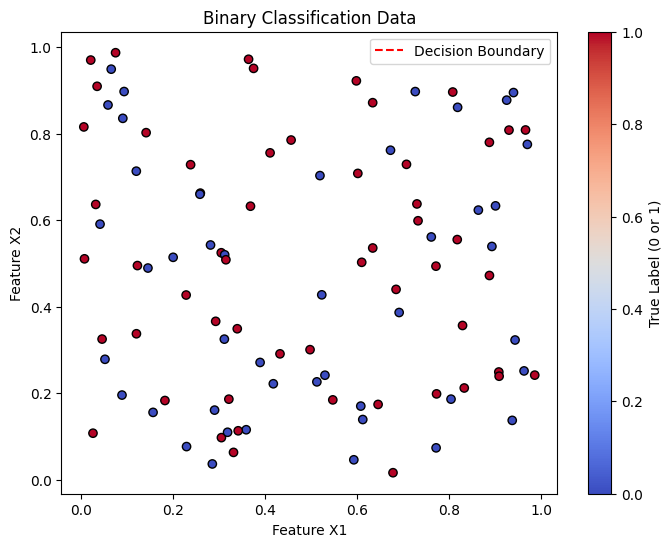

Cross-Entropy Loss: 0.8162
Predicted Probabilities: [0.20757281 0.47518888 0.4805196  0.1617551  0.37414562]
True Labels: [1 1 0 0 1]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(42)
num_samples = 100
X = np.random.rand(num_samples, 2)  # Features (X1, X2)
y = np.random.randint(2, size=num_samples)  # True labels (0 or 1)

# Logistic regression model (assumed)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Compute predicted probabilities
theta = np.array([1.5, -2])  # Coefficients (weights)
logits = np.dot(X, theta)
predicted_probs = sigmoid(logits)

# Calculate cross-entropy loss
eps = 1e-14  # Small value to avoid log(0)
loss = -np.mean(y * np.log(predicted_probs + eps) + (1 - y) * np.log(1 - predicted_probs + eps))

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')
plt.title('Binary Classification Data')
plt.colorbar(label='True Label (0 or 1)')

# Add decision boundary (optional)
boundary_x = np.linspace(0, 1, 100)
boundary_y = -(theta[0] * boundary_x + np.log(1 / theta[1] - 1)) / theta[1]
plt.plot(boundary_x, boundary_y, 'r--', label='Decision Boundary')

plt.legend()
plt.show()

print(f"Cross-Entropy Loss: {loss:.4f}")
print(f"Predicted Probabilities: {predicted_probs[:5]}")
print(f"True Labels: {y[:5]}")





##### Lets modify our Neuron Class so we can better use it in our Simple Nueral Network

In [23]:
import numpy as np
class Neuron:


    def __init__(self, input_size, learning_rate=0.1, type= 'Regression', vector=None):
        '''Class Constructor'''

        self.learning_rate = learning_rate
        self.type = type
        self.weights = np.random.rand(input_size)
        #? Structure of wieghts
        #? {0: [0.1, 0.2, 0.3], 1: [0.4, 0.5, 0.6]}

        self.vector = vector
        self.bias = np.random.rand(input_size)
        self.loss = []
        self.predictions = []

    def compute_sigmoid(self, x):
        '''Compute Sigmoid function'''
        return 1 / (1 + np.exp(-x))
    
    def compute_wieghted_sum(self, inputs):
        '''Compute Weighted Sum'''
        print(inputs)
        print(self.weights)


        self.weighted_sum=  np.dot(inputs, self.weights) + self.bias
        return np.dot(inputs, self.weights) + self.bias
    def sigmoid_derivative(self,x):
        sig = self.compute_sigmoid(x)
        return sig * (1 - sig)
    
    def compute_loss(self, predicted_output, actual_output):
        if self.type == 'Regression':
            return np.mean((predicted_output - actual_output) ** 2)
        elif self.type == 'Classification':
            epsilon = 1e-15
            #? NP clip is used to avoid log(0) which is undefined

            predicted_output = np.clip(predicted_output, epsilon, 1 - epsilon)
            actual_output = np.clip(actual_output, epsilon, 1 - epsilon)  # Ensure actual_output is also clipped
            return - np.mean(actual_output * np.log(predicted_output) + (1 - actual_output) * np.log(1 - predicted_output))
    def forward_propagation(self, input ):
        weighted_sum = self.compute_wieghted_sum(input)
        output = self.compute_sigmoid(weighted_sum)
        self.inputs = np.array(input)
        self.output = output
        return output, weighted_sum

    def compute_loss_derivative(self, predicted_output, actual_output):
        return predicted_output - actual_output

    def single_backward_propagation(self, grandients, bais_gradients):
        self.weights -= self.learning_rate * grandients
        self.bias -= self.learning_rate * bais_gradients     


    def update_weights(self, gradients, bias_gradient):
        print(self.weights)
        print(gradients)



        self.weights -= self.learning_rate * gradients
        self.bias -= self.learning_rate * bias_gradient


    def calculate_gradients(self, predicted_output, actual_output, ):
        error = predicted_output - actual_output
        d_loss_d_predicted = error
        d_predicted_d_weighted_sum = self.sigmoid_derivative(self.weighted_sum)
        gradients = d_loss_d_predicted * d_predicted_d_weighted_sum * self.inputs
        bias_gradient = d_loss_d_predicted * d_predicted_d_weighted_sum
        return gradients, bias_gradient

#### Making a layer class to represent a single layer of neurons

In [24]:
def can_multiply(a, b):
    """
    Check if two numpy arrays can be multiplied.
    
    Parameters:
    a (numpy.ndarray): First array.
    b (numpy.ndarray): Second array.
    
    Returns:
    bool: True if arrays can be multiplied, False otherwise.
    """
    if a.ndim == 1 and b.ndim == 1:
        # Vector dot product
        return a.shape[0] == b.shape[0]
    elif a.ndim == 2 and b.ndim == 2:
        # Matrix multiplication
        return a.shape[1] == b.shape[0]
    elif a.ndim == 2 and b.ndim == 1:
        # Matrix and vector multiplication
        return a.shape[1] == b.shape[0]
    elif a.ndim == 1 and b.ndim == 2:
        # Vector and matrix multiplication
        return a.shape[0] == b.shape[0]
    else:
        return False


In [25]:
import numpy as np

class Layer:
    def __init__(self, input_size, num_neurons, learning_rate=0.1, layer_type='Regression'):
        self.weights = np.random.randn(num_neurons, input_size) * np.sqrt(1 / input_size)
        self.biases = np.zeros(num_neurons)
        self.learning_rate = learning_rate
        self.tasktype = layer_type

    def compute_sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        sig = self.compute_sigmoid(x)
        return sig * (1 - sig)

    def compute_weighted_sum(self, inputs):
        return np.dot(inputs, self.weights.T) + self.biases
    
    def forward_propagation(self, inputs):
        self.inputs = inputs
        self.weighted_sum = self.compute_weighted_sum(inputs)
        self.output = self.compute_sigmoid(self.weighted_sum)
        return self.output

    def compute_loss(self, predicted_output, actual_output):
        if self.tasktype == 'Regression':
            return np.mean((predicted_output - actual_output) ** 2)
        elif self.tasktype == 'Classification':
            epsilon = 1e-15
            predicted_output = np.clip(predicted_output, epsilon, 1 - epsilon)
            actual_output = np.clip(actual_output, epsilon, 1 - epsilon)
            return -np.mean(actual_output * np.log(predicted_output) + (1 - actual_output) * np.log(1 - predicted_output))

    def calculate_gradients(self, error):
        d_output = error * self.sigmoid_derivative(self.weighted_sum)
        gradients = np.dot(d_output.T, self.inputs)
        bias_gradient = np.sum(d_output, axis=0)
        return gradients, bias_gradient

    
    def compute_error(self, error):
        d_output = error * self.sigmoid_derivative(self.weighted_sum)
        return np.dot(d_output, self.weights)



    def backward_propagation(self, gradients, bias_gradients):
        self.weights -= self.learning_rate * gradients
        self.biases -= self.learning_rate * bias_gradients


In [26]:
import numpy as np
import matplotlib.pyplot as plt



class Simple_Nueral_Network:
    def __init__(self, x, y, learning_rate=0.1, epochs=1000, tasktype='Regression', layer_neurons=5, hidden_layers=1,Graph=True):
        self.x = x
        self.y = y
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.tasktype = tasktype
        self.loss = []
        self.layer_neurons = layer_neurons
        self.hidden_layers_len = hidden_layers
        self.build_layers()
        self.Graph = Graph
    def build_layers(self):
        self.layers = []  

        for i in range(self.hidden_layers_len ): 
            input_size = self.x.shape[1] if i == 0 else self.layer_neurons
            self.layers.append(Layer(input_size, self.layer_neurons, self.learning_rate, layer_type= self.tasktype))

        self.layers.append(Layer(self.layer_neurons, 1, self.learning_rate))

        
    #?Through the hidden layers
    def forward_propagation(self, input_):
        current_inputs= np.array(input_ )
        for i in range(len(self.layers)):
                new_inputs =(self.layers[i].forward_propagation(current_inputs))
                current_inputs = np.array(new_inputs)

        return current_inputs

    def backward_propagation(self, predicted_output, actual_output):
        # Compute gradients for the output neuron
        error = predicted_output - actual_output

        for i in range(len(self.layers)-1, -1, -1):
                gradients, bias_gradient = self.layers[i].calculate_gradients(error)
                self.layers[i].backward_propagation(gradients,bias_gradient)


                if i>0:
                     error = self.layers[i].compute_error(error)



    def compute_loss(self, predicted_output, actual_output):
        if self.tasktype == 'Regression':
            return np.mean((predicted_output - actual_output) ** 2)
        elif self.tasktype == 'Classification':
            epsilon = 1e-15
            predicted_output = np.clip(predicted_output, epsilon, 1 - epsilon)
            actual_output = np.clip(actual_output, epsilon, 1 - epsilon)
            return - np.mean(actual_output * np.log(predicted_output) + (1 - actual_output) * np.log(1 - predicted_output))

    def train(self):
        for epoch in range(self.epochs):
           total_loss = 0
           current_predictions = []
           for i in range(len(self.x)):     
                y_pred = self.forward_propagation(self.x[i:i+1])
                current_predictions.append(y_pred)
                loss = self.compute_loss(y_pred, self.y[i:i+1])
                total_loss += loss
                self.backward_propagation(y_pred, self.y[i:i+1])
           average_loss = total_loss / len(self.x)
                
           self.loss.append(average_loss)

       

           print(f'Epoch: {epoch}, Loss: {average_loss}')

        if self.Graph:
            plt.plot(self.loss)
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.title('Loss vs Epochs')
            plt.show()

    

    def predict(self, x):
        predictions = []
        for i in range(len(x)):
            pred = self.forward_propagation(x[i:i+1])
            if self.tasktype == 'Classification':
                pred = (pred > 0.5).astype(int)
            predictions.append(pred)
        return np.array(predictions)




In [27]:
# Generate synthetic data for regression
np.random.seed(42)
x_regression = np.random.rand(100, 2)  # 100 samples, 2 features
y_regression = 5 * x_regression[:, 0] + 3 * x_regression[:, 1] + np.random.randn(100) * 0.5  # Linear relation with noise

# Split into training and testing datasets
X_train_regression = x_regression[:80]  # 80% training data
X_test_regression = x_regression[80:]   # 20% testing data
y_train_regression = y_regression[:80]
y_test_regression = y_regression[80:]

print("Regression Data:")
print("X_train_regression:", X_train_regression[:5])
print("y_train_regression:", y_train_regression[:5])
print("X_test_regression:", X_test_regression[:5])
print("y_test_regression:", y_test_regression[:5])


Regression Data:
X_train_regression: [[0.37454012 0.95071431]
 [0.73199394 0.59865848]
 [0.15601864 0.15599452]
 [0.05808361 0.86617615]
 [0.60111501 0.70807258]]
y_train_regression: [4.38483115 5.57207201 1.394613   2.53177079 6.06268005]
X_test_regression: [[0.36778313 0.63230583]
 [0.63352971 0.53577468]
 [0.09028977 0.8353025 ]
 [0.32078006 0.18651851]
 [0.04077514 0.59089294]]
y_test_regression: [3.75861908 4.44917243 4.02932838 2.48041537 0.96398324]


In [28]:
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data for classification with 10 features
num_samples = 1000
num_features = 10
x_classification = np.random.rand(num_samples, num_features)

# Create a complex relationship for the labels
weights = np.random.rand(num_features)  # Random weights
biases = np.random.rand() * 0.5  # Small random bias
noise = np.random.normal(0, 0.1, num_samples)  # Noise

# Polynomial and interaction terms
poly_term = x_classification[:, 0] ** 2 + x_classification[:, 1] ** 2
interaction_term = x_classification[:, 0] * x_classification[:, 1]

# Compute the labels based on a non-linear function
linear_combination = np.dot(x_classification, weights) + biases + poly_term + interaction_term + noise
threshold = linear_combination.mean()  # Threshold to split classes
y_classification = (linear_combination > threshold).astype(int)

# Split into training and testing datasets
split_index = int(num_samples * 0.8)
X_train_classification = x_classification[:split_index]
X_test_classification = x_classification[split_index:]
y_train_classification = y_classification[:split_index]
y_test_classification = y_classification[split_index:]




output = {
    "Classification Data": {
        "X_train_classification": X_train_classification[:5],
        "y_train_classification": y_train_classification[:5],
        "X_test_classification": X_test_classification[:5],
        "y_test_classification": y_test_classification[:5]
    }
}

output


{'Classification Data': {'X_train_classification': array([[0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
          0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258],
         [0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497,
          0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914],
         [0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998,
          0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.04645041],
         [0.60754485, 0.17052412, 0.06505159, 0.94888554, 0.96563203,
          0.80839735, 0.30461377, 0.09767211, 0.68423303, 0.44015249],
         [0.12203823, 0.49517691, 0.03438852, 0.9093204 , 0.25877998,
          0.66252228, 0.31171108, 0.52006802, 0.54671028, 0.18485446]]),
  'y_train_classification': array([1, 0, 0, 0, 0]),
  'X_test_classification': array([[0.72026792, 0.687283  , 0.0957542 , 0.9225724 , 0.5684722 ,
          0.36372552, 0.75653858, 0.25736546, 0.69350984, 0.03971121],
         [0.83940804, 0.44

Epoch: 0, Loss: 12.436057375349904
Epoch: 1, Loss: 12.004386760017084
Epoch: 2, Loss: 11.977928193070879
Epoch: 3, Loss: 11.968177636088255
Epoch: 4, Loss: 11.963155389204355
Epoch: 5, Loss: 11.960113993215598
Epoch: 6, Loss: 11.958083927586845
Epoch: 7, Loss: 11.956637381782663
Epoch: 8, Loss: 11.955556975429527
Epoch: 9, Loss: 11.954720845663148


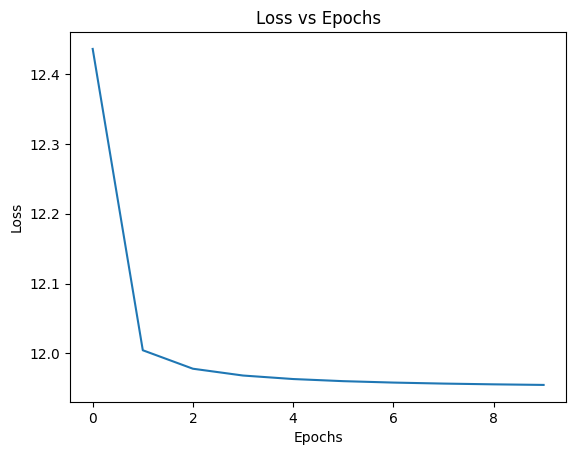

Predicted Regression: [[[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.9989

In [29]:
# For Regression
nn_regression = Simple_Nueral_Network(x_regression, y_regression, learning_rate=0.1, epochs=10, tasktype='Regression', layer_neurons=5, hidden_layers=20)
nn_regression.train()



predicted_regression = nn_regression.predict(x_regression)
print("Predicted Regression:", predicted_regression)



In [30]:
print("Predicted Regression:", predicted_regression)
print("y_test_classification:", y_test_regression)


Predicted Regression: [[[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.99899775]]

 [[0.9989

Epoch: 0, Loss: 0.6956676591699349
Epoch: 1, Loss: 0.6902305121012308
Epoch: 2, Loss: 0.6821740977131735
Epoch: 3, Loss: 0.668910566108232
Epoch: 4, Loss: 0.6450727155146626
Epoch: 5, Loss: 0.602074385632366
Epoch: 6, Loss: 0.5342656817464129
Epoch: 7, Loss: 0.45384575412424333
Epoch: 8, Loss: 0.382083446960464
Epoch: 9, Loss: 0.3267458743427128
Epoch: 10, Loss: 0.28537786905083534
Epoch: 11, Loss: 0.2540262095376116
Epoch: 12, Loss: 0.22979260846326546
Epoch: 13, Loss: 0.2107460561311571
Epoch: 14, Loss: 0.19555318379133507
Epoch: 15, Loss: 0.18326615844412475
Epoch: 16, Loss: 0.17320007629733258
Epoch: 17, Loss: 0.16485206774431074
Epoch: 18, Loss: 0.1578477275653452
Epoch: 19, Loss: 0.15190532935730466
Epoch: 20, Loss: 0.14681101277943187
Epoch: 21, Loss: 0.1424010470094375
Epoch: 22, Loss: 0.13854897589626372
Epoch: 23, Loss: 0.13515624964237136
Epoch: 24, Loss: 0.1321453678140752
Epoch: 25, Loss: 0.12945483272711222
Epoch: 26, Loss: 0.12703541025006795
Epoch: 27, Loss: 0.124847338

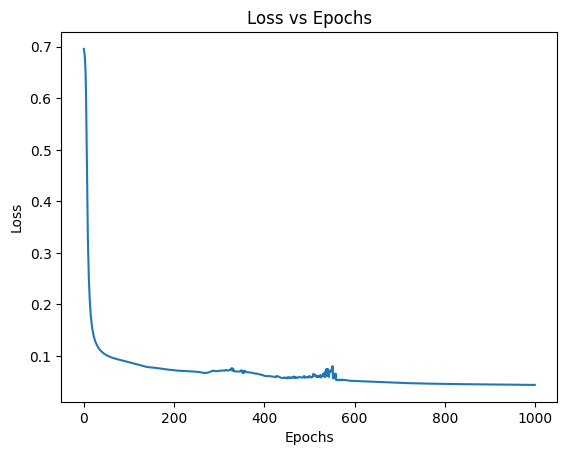

In [78]:
# For Classification
nn_classification = Simple_Nueral_Network(X_train_classification, y_train_classification, learning_rate=0.1, epochs=1000, tasktype='Classification', layer_neurons=20, hidden_layers=2)
nn_classification.train()



In [81]:
predicted_classification = nn_classification.predict(X_test_classification)
print("Predicted Classification:", predicted_classification.flatten())
print("Actual Values:", y_test_classification.flatten())

Predicted Classification: [1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0
 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1
 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1
 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0]
Actual Values: [1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1
 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1
 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1
 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0]


In [82]:
#metrics
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import f1_score

print("Accuracy:", accuracy_score(y_test_classification, predicted_classification.flatten()))
print("f1_score:", f1_score(y_test_classification, predicted_classification.flatten()))

Accuracy: 0.955
f1_score: 0.9513513513513514


# Neural Network Training: Understanding Gradients and Backpropagation

## Introduction
This document explains the fundamental concepts of gradients and backpropagation in the training of neural networks, particularly focusing on how partial derivatives are utilized to update the network's weights and biases effectively.

## The Role of \( z \) in Neural Networks

### Definition of \( z \)
In a neural network, \( z \) is defined as the weighted sum of inputs plus a bias term for each neuron:
$ z = W \cdot X + b $
where \( W \) represents the weights, \( X \) represents the inputs to the neuron or layer, and \( b \) is the bias.

### Dynamic Nature of \( z \)
\( z \) is not a constant but a variable that changes with every input (\( X \)) and adjustment to weights (\( W \)). It is recalculated during every forward pass of the network based on the current inputs and weights.

## Computation of Partial Derivatives and Gradients

### Importance of Partial Derivatives
In neural network training, the partial derivative of the loss function with respect to each weight is critical. It indicates how a small change in each weight affects the overall loss, guiding how to update weights to minimize the loss.

### Gradient Computation Process

1. **Forward Pass**: 
   - Compute \( z \) and subsequently the output \( y \) for each layer using the activation function.

2. **Loss Calculation**: 
   - Determine the loss using a loss function, comparing the predicted output \( y \) with the actual target values.

3. **Backward Pass (Backpropagation)**:
   - **Output Layer Gradient**: Calculate the derivative of the loss with respect to the output $(( \frac{\partial \text{Loss}}{\partial y} ))$.
   - **Chain Rule Application**: Propagate sensitivities back through the network using the chain rule:
     $
     \frac{\partial \text{Loss}}{\partial z} = \frac{\partial \text{Loss}}{\partial y} \times \frac{\partial y}{\partial z}
     $
   - **Gradients for Weights and Biases**: Compute gradients for each weight and bias:
     $
     \frac{\partial \text{Loss}}{\partial W} = \text{input}^T \times \frac{\partial \text{Loss}}{\partial z}
     $
     $
     \frac{\partial \text{Loss}}{\partial b} = \frac{\partial \text{Loss}}{\partial z} \quad
     $

4. **Update Weights and Biases**: 
   - Use gradient descent or another optimization method to adjust \( W \) and \( b \) to minimize the loss.



### Adding more Activation Functions for Regression and MultiClass Classifcation

In [ ]:
import numpy as np

class Layer:
    def __init__(self, input_size, num_neurons, learning_rate=0.1, layer_type='Regression', activation='sigmoid'):
        self.weights = np.random.randn(num_neurons, input_size) * np.sqrt(1 / input_size)
        self.biases = np.zeros(num_neurons)
        self.learning_rate = learning_rate
        self.tasktype = layer_type
        self.activation = activation


    def compute_activation(self, x):
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        elif self.activation == 'relu':
            return np.maximum(0, x)
        elif self.activation == 'tanh':
            return np.tanh(x)
        
        elif self.activation == 'softmax':
            exps = np.exp(x - x.max())
            return exps / np.sum(exps, axis=1, keepdims=True)

        else:
            return x


    def activation_derivative(self, x):
        if self.activation == 'sigmoid':
            sig = self.compute_activation(x)
            return sig * (1 - sig)
        elif self.activation == 'relu':
            return np.where(x <= 0, 0, 1)
        elif self.activation == 'tanh':
            return 1 - np.tanh(x) ** 2
        else:
            return x


    def compute_weighted_sum(self, inputs):
        return np.dot(inputs, self.weights.T) + self.biases
    
    def forward_propagation(self, inputs):
        self.inputs = inputs
        self.weighted_sum = self.compute_weighted_sum(inputs)
        self.output = self.compute_sigmoid(self.weighted_sum)
        return self.output

    def compute_loss(self, predicted_output, actual_output):
        if self.tasktype == 'Regression':
            return np.mean((predicted_output - actual_output) ** 2)
        elif self.tasktype == 'Classification':
            epsilon = 1e-15
            predicted_output = np.clip(predicted_output, epsilon, 1 - epsilon)
            actual_output = np.clip(actual_output, epsilon, 1 - epsilon)
            return -np.mean(actual_output * np.log(predicted_output) + (1 - actual_output) * np.log(1 - predicted_output))

    def calculate_gradients(self, error):
        d_output = error * self.activation_derivative(self.weighted_sum) #calculate the derivative of the loss with respect to the weighted sum
        gradients = np.dot(d_output.T, self.inputs) #calculate the gradient of the loss with respect to the weights
        bias_gradient = np.sum(d_output, axis=0)
        return gradients, bias_gradient

    
    def compute_error(self, error):
        d_output = error * self.sigmoid_derivative(self.weighted_sum)
        return np.dot(d_output, self.weights)



    def backward_propagation(self, gradients, bias_gradients):
        self.weights -= self.learning_rate * gradients
        self.biases -= self.learning_rate * bias_gradients
